In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
sns.set()
pd.set_option('display.max_columns', 80)
pd.options.display.float_format = '{:.1f}'.format

In [2]:
data = pd.read_csv('FIFA 2019 Players Data Cleaned.csv')

In [3]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2004-07-01,2021-01-01,67,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,...,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2018-07-10,2022-01-01,74,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,...,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2017-08-03,2022-01-01,69,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,...,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,2011-07-01,2020-01-01,76,168,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,69,66,...,63,52,52,52,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2015-08-30,2023-01-01,71,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,...,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [4]:
data.shape

(17955, 83)

# Exploratory Data Analysis

### 1.  How player potential depended on age.

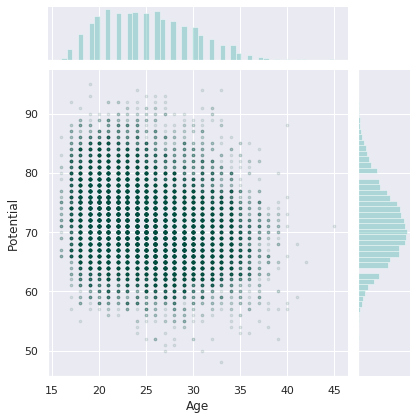

In [5]:
sns.jointplot(data['Age'], data['Potential'], kind="scatter", 
              joint_kws={'alpha': 0.1, 's': 7, 'color':'#004d40'}, marginal_kws={'color': '#4db6ac'})
plt.show()

After the age of 27. Player potential start decreasing with time. <br>
Most of the players potential lie in the scale between 63 to 80. These playes are lie in mid age.<br>
Potential Below and Above 63 to 80 players will be young and old.

### 2. How player preferred foot and attack/defence work rate effecting the rating.

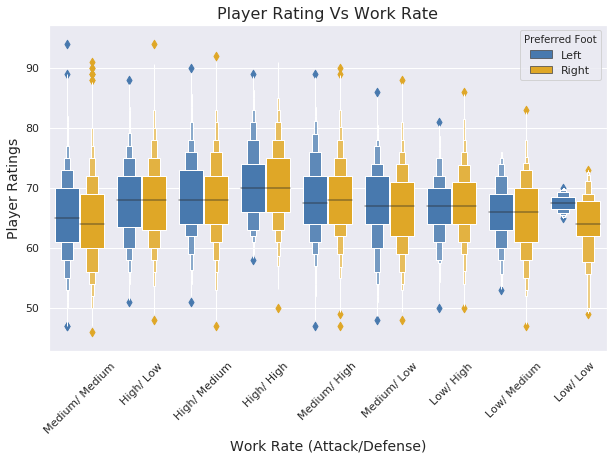

In [6]:
plt.figure(figsize=[10, 6])
sns.boxenplot(data=data, x='Work Rate', y='Overall', hue='Preferred Foot', palette=sns.xkcd_palette(["windows blue", "amber"]))
plt.xticks(rotation=45)
plt.xlabel('Work Rate (Attack/Defense)', fontsize=14)
plt.ylabel('Player Ratings', fontsize=14)
plt.title('Player Rating Vs Work Rate', fontsize=16)
plt.show()

1. Players who have both high attack and defence rate got highest average rating which is 70.<br>
2. We are noticing that some players inspite of having medium attack/ defence rate or one of them is low have the highest rating. Even they are in the list of top 3 players in the work.<br>
3. We have very low variations of ratings of Left foot people with low attack/defence rate.<br>
4. Some players with high defense/attack rate showing low ratings.

### 3. Top football players in the world and their market value

In [7]:
top_players = data[data['Overall'] >= 90][['Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value']]
top_players.columns = ['Name', 'Age', 'Nationality', 'Rating', 'Club', 'Market Value (Euro)']

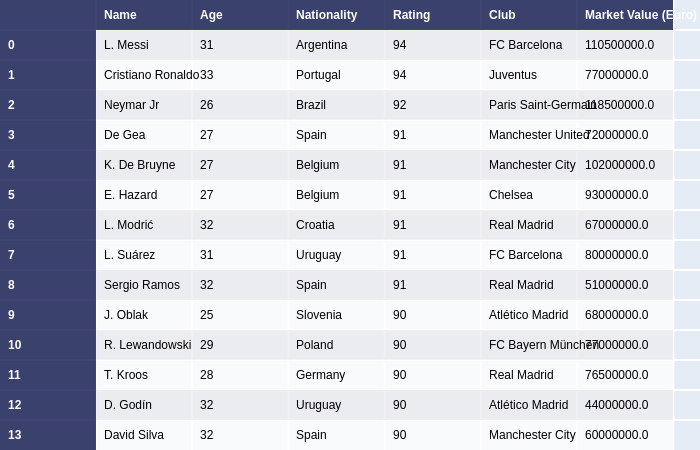

In [8]:
fig = ff.create_table(top_players, index=True)
fig.show('png')

### 4. Which Country produce most players.

In [9]:
reputation = pd.DataFrame(data.groupby( 'Nationality')['Name'].count())
reputation.reset_index(inplace=True)
reputation

,Nationality,Name
0,Afghanistan,4
1,Albania,40
2,Algeria,60
3,Andorra,1
4,Angola,15
...,...,...
158,Uzbekistan,2
159,Venezuela,60
160,Wales,128
161,Zambia,9


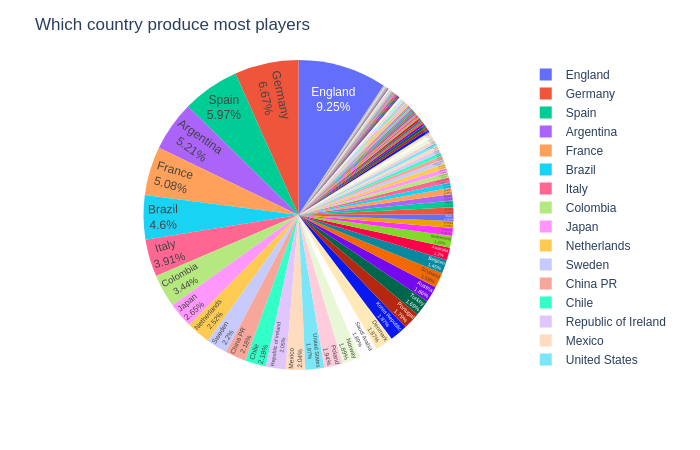

In [10]:
fig = px.pie(reputation, values='Name', names='Nationality')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title ='Which country produce most players')
fig.show('png')

1. England 9.25%
2. Germany 6.67%
3. Spain 5.97%
4. Argentina 5.21%
5. France 5.08% <br>
These are the top 5 countries which produced the most of the players.

### 5. Top 10 Clubs on the basis of player rating/potential.

In [11]:
club_rating = pd.DataFrame(data.groupby('Club')[['Overall', 'Potential']].mean())
club_rating = club_rating.nlargest(10, ['Overall', 'Potential'])
club_rating.reset_index(inplace=True)
clubs = pd.melt(club_rating, id_vars='Club', var_name='Overall')
clubs.columns = ['Club', 'Status' ,'Rating/Potential']

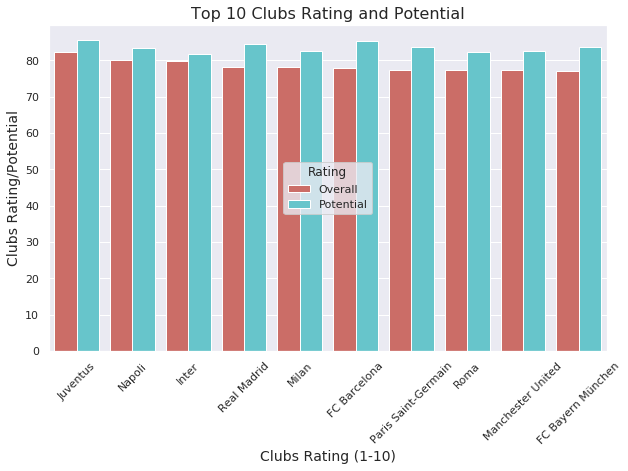

In [12]:
plt.figure(figsize=[10,6])
sns.barplot(data=clubs, x='Club', y='Rating/Potential', hue='Status', palette="hls")
plt.xticks(rotation=45)
plt.xlabel('Clubs Rating (1-10)', fontsize=14)
plt.ylabel('Clubs Rating/Potential', fontsize=14)
plt.title('Top 10 Clubs Rating and Potential', fontsize=16)
plt.legend(loc='center', title='Rating')
plt.show()

Juventus club in lead position. Follow by Inter and Napoli.

### 6. How skills affecting the player value.

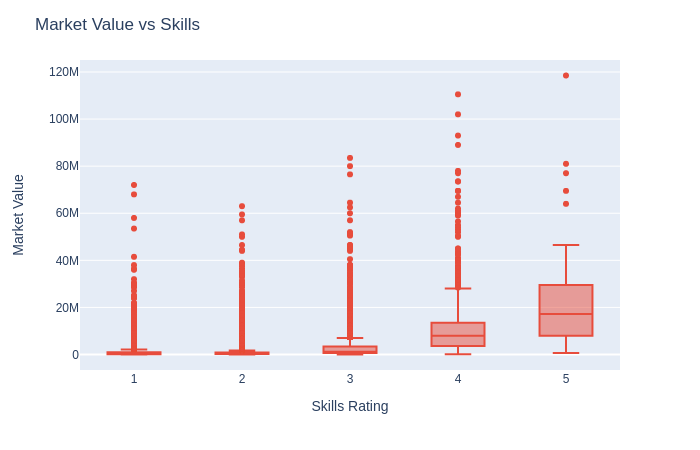

In [13]:
fig = px.box(x=data['Skill Moves'], y=data['Value'], points="outliers", 
             color_discrete_sequence= ['#e74c3c'])
fig.update_layout(
    title='Market Value vs Skills',
    yaxis_title='Market Value',
    xaxis_title='Skills Rating'
)
fig.show('png')

It's obvious players will more skills worth more.

### 7. Worlds best game finisher?

In [14]:
finishers = data.nlargest(10, 'Finishing')[['Name', 'Finishing']]

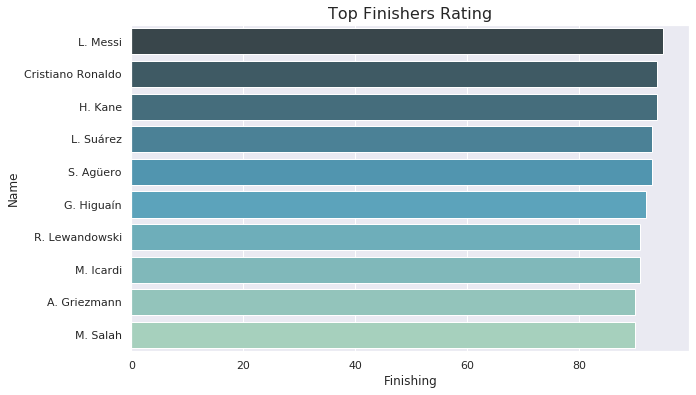

In [15]:
plt.figure(figsize=[10, 6])
sns.barplot(data = finishers, y='Name', x='Finishing', orient='h', palette='GnBu_d')
plt.title('Top Finishers Rating', fontsize = 16)
plt.show()

L. Messi, Cr. Ronaldo and H. Kane are top 3 finishers.

### 8. What is player value with respect to international rating, weak foot and skills.

In [16]:
# definig method for reuseable code
def playes_values(cate):
    p_min = pd.DataFrame(data.groupby(cate)['Value'].min())
    p_min.reset_index(inplace=True)
    p_min['Type'] = 'Minimum Value'
    p_mean = pd.DataFrame(data.groupby(cate)['Value'].mean())
    p_mean.reset_index(inplace=True)
    p_mean['Type'] = 'Mean Value'
    p_max = pd.DataFrame(data.groupby(cate)['Value'].max())
    p_max.reset_index(inplace=True)
    p_max['Type'] = 'Maximum Value'
    player_value = pd.concat([p_min, p_mean, p_max], ignore_index=True)
    return player_value

In [17]:
international_rep = playes_values('International Reputation')
weak_foot = playes_values('Weak Foot')
skill_moves = playes_values('Skill Moves')

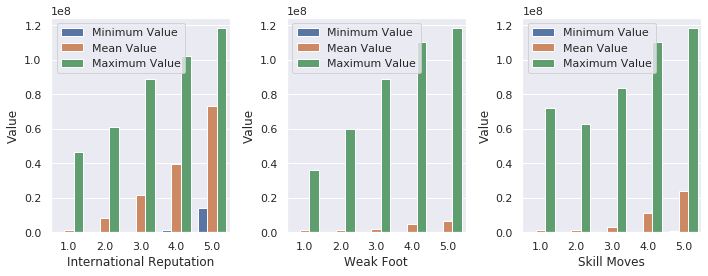

In [18]:
plt.figure(figsize=[10,4])

#subplot 1
plt.subplot(1, 3, 1)
sns.barplot(data=international_rep, x='International Reputation', y='Value', hue='Type')
plt.legend(loc='best')

#subplot 2
plt.subplot(1, 3, 2)
sns.barplot(data=weak_foot, x='Weak Foot', y='Value', hue='Type')
plt.legend(loc='best')

#subplot 3
plt.subplot(1, 3, 3)
sns.barplot(data=skill_moves, x='Skill Moves', y='Value', hue='Type')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Minimum players value is zero it means that players aren't paying. By looking at graph only the players with international reputation 4, 5 are getting money.<br>
The reason can be their contract ended or very bad reputation.

### 9. Which club have the most skilled Goal Keeping player.

In [19]:
gk = data.nlargest(10, columns=['GKHandling', 'GKKicking', 'GK', 'GKReflexes'])[['Name', 'Club', 'GKHandling', 'GKKicking', 'GK', 'GKReflexes']]
gk['Average'] = (data['GKHandling']+data['GKKicking']+data['GK']+data['GKReflexes'])/4
gk = pd.melt(gk, ['Name', 'Club'], value_name='Ratings', var_name='Skills')

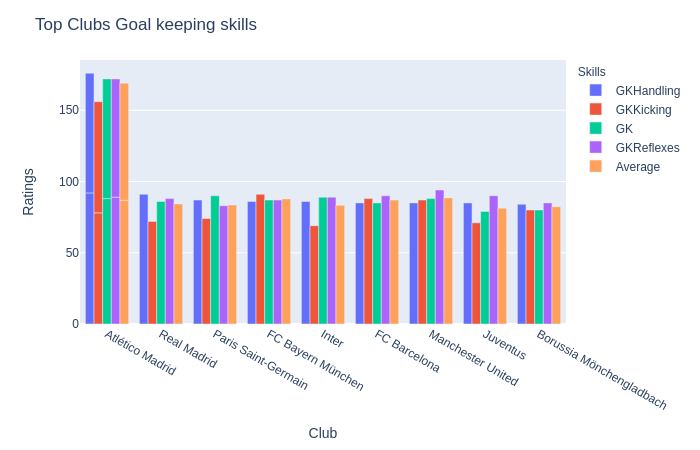

In [20]:
fig = px.bar(data_frame=gk, x='Club', y='Ratings', color='Skills', barmode='group', 
             hover_data=['Name', 'Club', 'Skills', 'Ratings'])
fig.update_layout(title='Top Clubs Goal keeping skills')
fig.show('png')

Everton leading the all clubs and it's best skills among all is kick. This club player have highest kick rating.<br>
One interesting thing we can notice that Fc Barcelona player is in the list of top 10 players in the world.

### 10. How many players care about their fitness.

In [21]:
fitness = pd.DataFrame(data['Body Type'].value_counts())
fitness.reset_index(inplace=True)
fitness.columns = ['Body Type', 'Players']

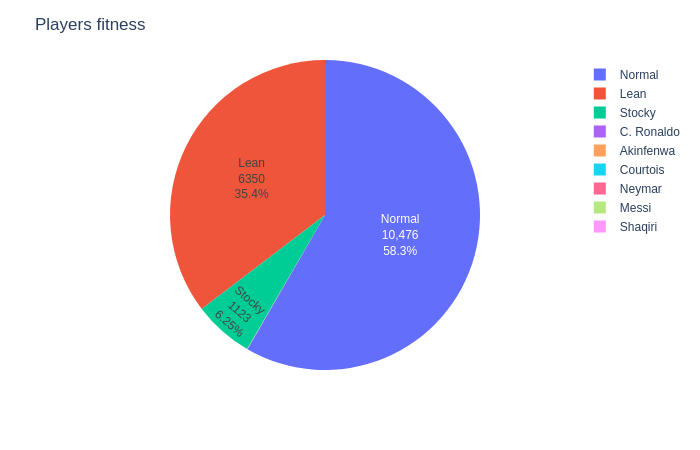

In [22]:
fig = px.pie(fitness, values='Players', names='Body Type')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.update_layout(title='Players fitness')
fig.show('png')

More than half players have Normal body type which is 57% followed by lean 37% and stocky 6%<br>
One thing we can notice that some players have their names in their body type that's because they very unique their own type of body type so, they just put their to show that.

### 11. How Body type affecting the stamina of Player.

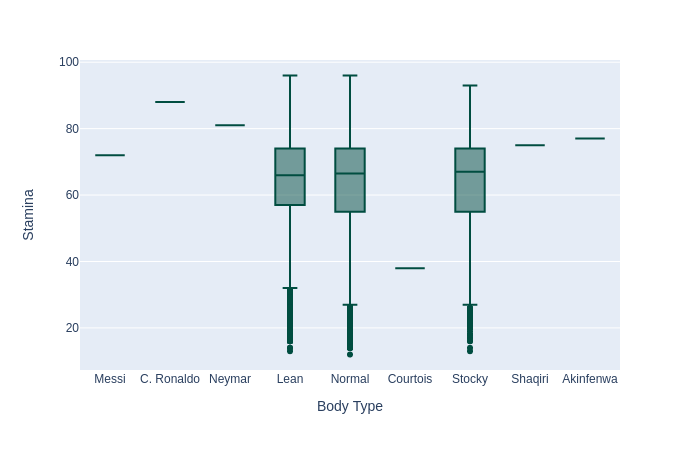

In [23]:
fig = px.box(data, x='Body Type', y='Stamina', color_discrete_sequence= ['#004d40'])
fig.show('png')

1. Normal<br>
    Max stamina of normal body is highest among the all the body types. 
    1. Max stamina = 96.
    2. Median = 68 (Average).
    3. Min = 27.
2. Lean<br>
    Max stamina is equal to normal body lowest stamina showing better numbers 30.
    1. Max = 96.
    2. Median(Average) = 67.
    3. Min = 30
3. Stocky<br>
    Max stamina decreased of stocky body but average stamina increased.
    1. MAx = 93.
    2. Median = 69.
    3. Min = 29.<br>

<p>In all other single body category CR. Ronaldo have best stamina.</p>

### 12. Relation between wage over all rating of player.

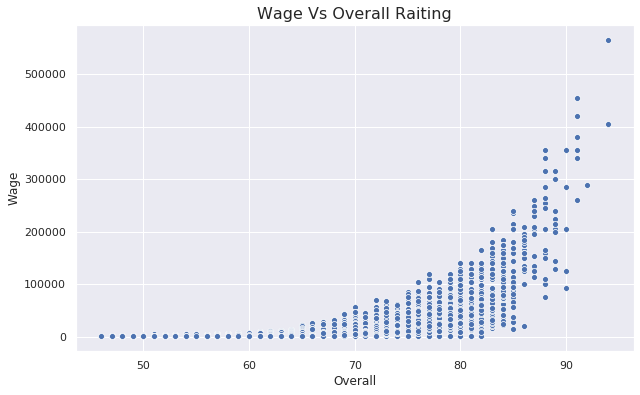

In [24]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=data['Overall'], y=data['Wage'])
plt.title('Wage Vs Overall Raiting', fontsize=16)
plt.show()

Direct relation between both features. We also seeing some strange values players having rating less than 65 have very low wage or no wage.

### 13. Players Market value and Wage wrt different classes.

We will define different classes for players rating.
1. 91-100: Class A
2. 81-90: Class B
3. 71-80: Class C
4. 61-70: Class D
5. 51-60: Class E
6. 41-50: Class F
7. 31-40: Class G
8. 21-30: Class H
9. 11-20: Class I
10. 1-10: Class J

In [25]:
def assign_class(value):
    if value >= 91 and value <= 100:
        return 'A'
    elif value >= 81 and value <= 90:
        return 'B'
    elif value >=71 and value <= 80:
        return 'C'
    elif value >=61 and value <= 70:
        return 'D'
    elif value >=51 and value <= 60:
        return 'E'
    elif value >=41 and value <= 50:
        return 'F'
    elif value >=31 and value <= 40:
        return 'G'
    elif value >=21 and value <= 30:
        return 'H'
    elif value >=11 and value <= 20:
        return 'I'
    elif value >=1 and value <= 10:
        return 'J'

In [26]:
c_mv = data[['Overall', 'Value']]
c_mv['Class'] = c_mv['Overall'].apply(lambda x: assign_class(x))
c_w = data[['Wage', 'Overall']]
c_w['Class'] = c_w['Overall'].apply(lambda x: assign_class(x))

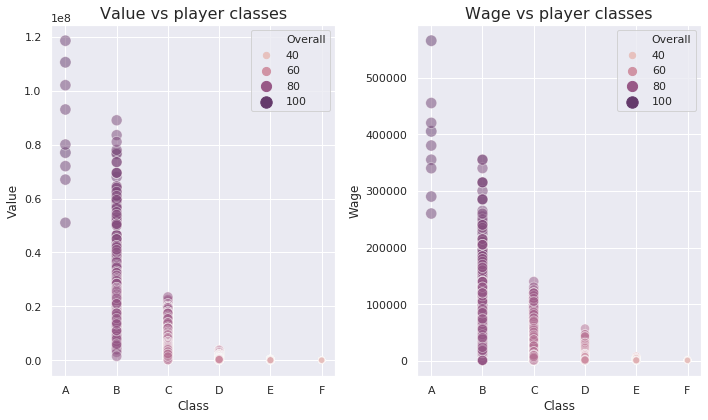

In [27]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

plt.figure(figsize=[10,6])
plt.subplot(1, 2, 1)
sns.scatterplot(data=c_mv, x='Class', y='Value', size='Overall', alpha=0.5, sizes=(40, 130), hue='Overall', 
               palette=cmap)
plt.title('Value vs player classes', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(data=c_w, x='Class', y='Wage', size='Overall', alpha=0.5, sizes=(40, 130), hue='Overall', 
               palette=cmap)

plt.tight_layout()
plt.title('Wage vs player classes', fontsize=16)
plt.show()

Class A have very few players but high value and wage. <br>
Class B have highest number of players and Good average wage and value.<br>
Class C have low amount of value and wage but classes below this have very low amount.

## How player remaining contract affecting player Wage.

In [28]:
data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'])

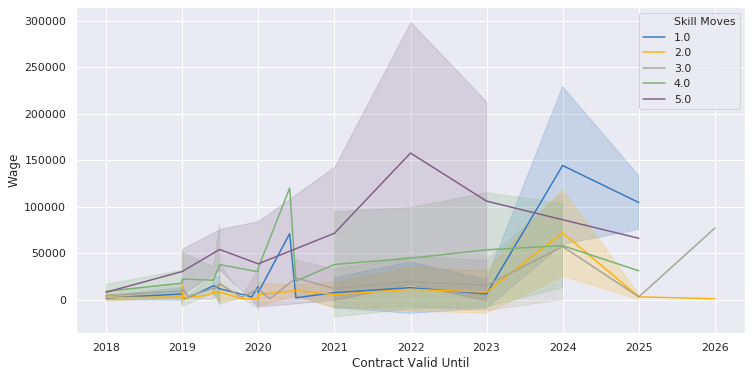

In [29]:
plt.figure(figsize=[12,6])
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.lineplot(data=data, x='Contract Valid Until', y='Wage', ci='sd', palette=sns.xkcd_palette(colors), hue='Skill Moves')
plt.show()

Most of the highly skills players contracts with high wage expiring in 2022. <br>
Most players with lowest skills rating have long term contract. Most of the valid contracts till 2024 then 2025.<br>
Only mid and below mid skill players contracts valid till 2026. All other will expire in 2025. These playes have extra one year in their contract.

## Total Contract duration of players

In [30]:
data['Joined'] = pd.to_datetime(data['Joined'])

In [31]:
a = data['Contract Valid Until'].dt.year - data['Joined'].dt.year

In [32]:
a.unique()

array([17,  4,  5,  9,  8,  7, 15, 10, 14,  6,  2, 12,  3,  1, 13, 11,  0,
       20, 16, 18, 19, 30, 23, 21, 22])

In [33]:
contract_dur = pd.DataFrame(a.value_counts(), columns=['Number of Players'])
contract_dur.reset_index(inplace=True)
contract_dur.rename(columns={'index':'Contract Duration (Years)'}, inplace=True)

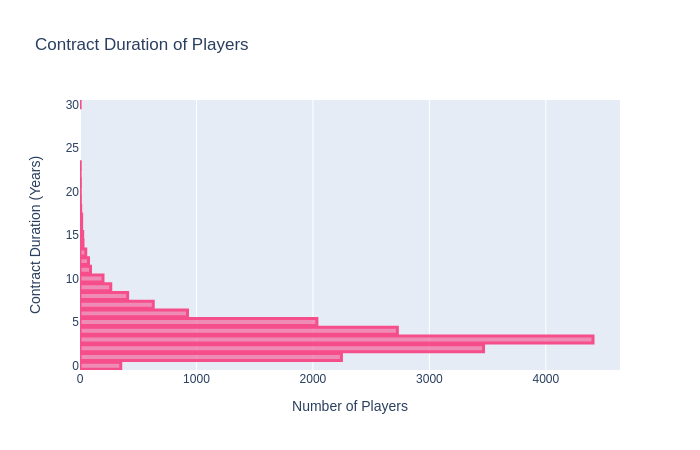

In [35]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=contract_dur['Number of Players'],
    y=contract_dur['Contract Duration (Years)'],
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.update_layout(barmode='stack',
                 title='Contract Duration of Players',
                 yaxis_title = 'Contract Duration (Years)',
                 xaxis_title = 'Number of Players')
fig.show('png')

Majority of players have 3 years contract with club then follow by 2 years and 4.<br>
Some Players contract duration is even longer than 20 years.

## Takeaway:
1. After the age 25 player potential start decreasing.
2. Players with high defence and rate have high rating but some players with having low or medium one of them also have high rating.
3. Messi, Ronaldo and Naymar are three leading players.
4. England with 9.31%, Germany with 6.47% and Spain 6% leading the countries category of most players produced by countries.
5. Juventus is the leading Club followed by inter and napoli.
6. Player values increase with increase of it's skills.
7. L Messi and Cr Ronaldo are the finishers.
8. International reputation, week foot and skills moves have direct relation with player value but average value of week foot and skills moves are less than inter reputation.
9. Everton have most skilled goal keeper.
10. 56% players body shape is normal, 37% lean and 6.1% with stocky body shape.
11. Body shape doesn't affecting too much player stamina.
12. Wage starting increasing for players after rating 65.
13. Most of the players lie in class B with medium wage and value. Ver few lie in class but with high wage and value.